Exploratory Data Analysis(EDA) -> It is a task of analysing data using simple tools from stats, plotting tools, linear algebra.

A vector is a numbered array and a 1-D array is a Scalar.

In [1]:
# We are given the IRIS dataset and the objective is to classify a new flower as belonging to one of the
# 3 classes given the 4 features.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
iris = pd.read_csv('iris.csv')

In [3]:
print(iris.shape)
print(iris.columns)

(150, 5)
Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [4]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
# Q -> How many data points for each class are present?
iris["variety"].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

# 2-D Scatter Plot

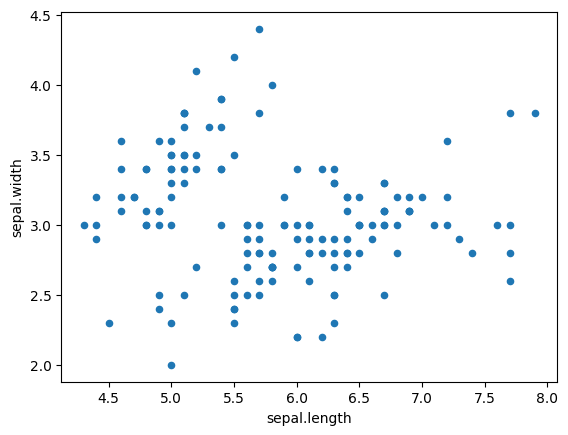

In [6]:
# 2-D Scatter Plot 
# Always understand the axis: labels and scale

iris.plot(kind = 'scatter', x = 'sepal.length', y = 'sepal.width')
plt.show()

# We cannot make much sense out of it, let's color the points by their class-label / flower - type.

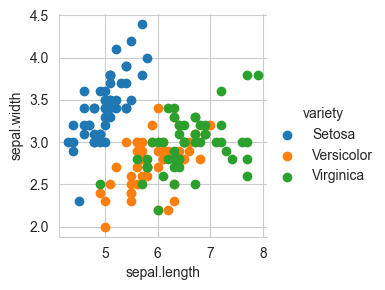

In [7]:
# 2-D Scatter plot with color-coding for each flower type / class

sns.set_style('whitegrid')
sns.FacetGrid(iris, hue = "variety", height = 3) \
    .map(plt.scatter, "sepal.length", "sepal.width") \
    .add_legend()
plt.show()
plt.close()

# Observations :-
# 1. Using sepal.length and sepal.width we can distinguish Setosa flowers from others.
# 2. Separating Versicolor and Virginica is much harder as they have considerable overlap.

# 3-D Scatter Plots

In [8]:
# 3-D Scatter Plot --> It is not easy to plot them on pen and paper and we try to avoid it. 
# We will need to do a lot of Mouse movement.

# Pair-Plot

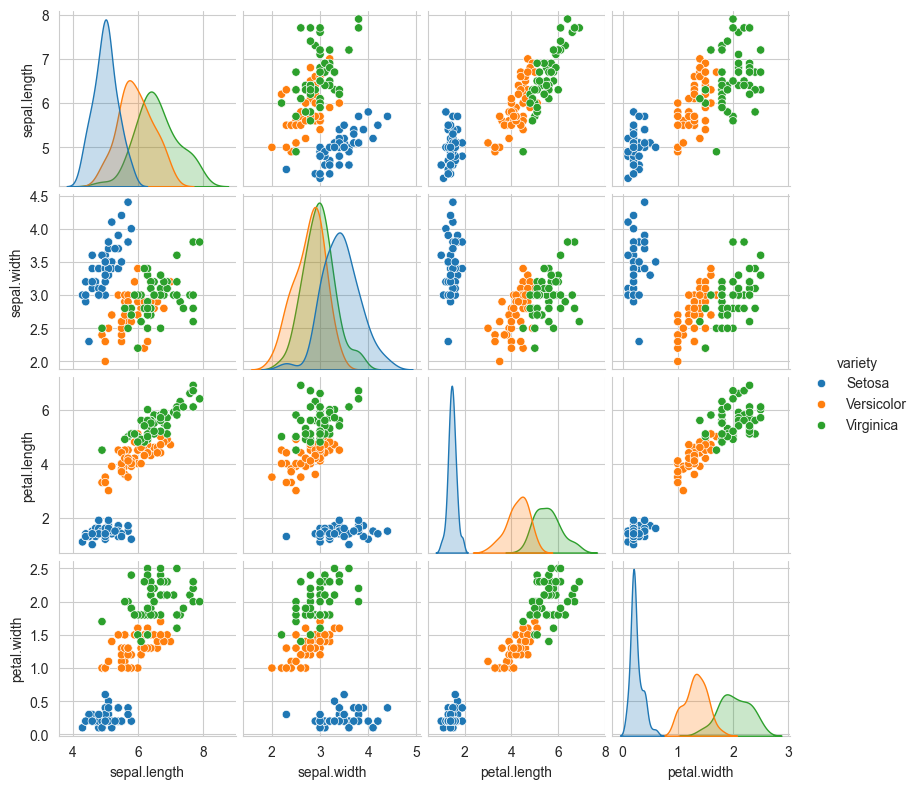

In [9]:
# Paiwise scatter plot is Pair-Plot
# Since we as human we can't visualize 4-D scatter plots(We have 4 variables), we can use Pair-plots.
# We can have 4C2 = 6 pair plots to visaulize

sns.set_style("whitegrid")
sns.pairplot(iris, hue = 'variety', height = 2)
plt.show()

Observations :- 
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

Limitation of Pair-Plot -> Here we have only 4 features what if we had 10 features? In the case of 
10 features we will have to look for 10C2 plots and in case of 100 it will be 100C2. So, pair-plots
can be use if we have less features but as the number of features / dimensions increases we shouldn't
use pair plot.

# Histogram, PDF, CDF

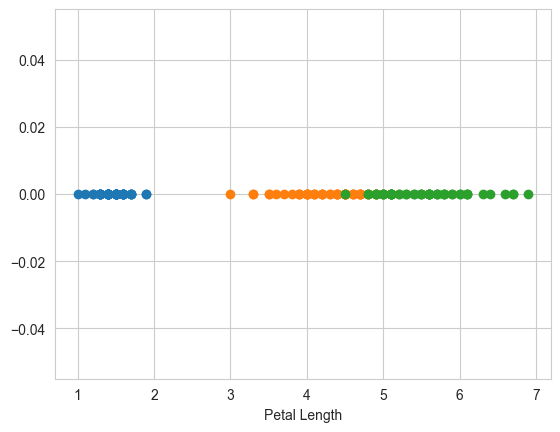

In [10]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["variety"] == "Setosa"];
iris_virginica = iris.loc[iris["variety"] == "Virginica"];
iris_versicolor = iris.loc[iris["variety"] == "Versicolor"];
# print(len(iris_versicolor["petal.length"]))
plt.plot(iris_setosa["petal.length"], np.zeros_like(iris_setosa['petal.length']), 'o')
plt.plot(iris_versicolor["petal.length"], np.zeros_like(iris_versicolor['petal.length']), 'o')
plt.plot(iris_virginica["petal.length"], np.zeros_like(iris_virginica['petal.length']), 'o')
plt.xlabel("Petal Length")

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

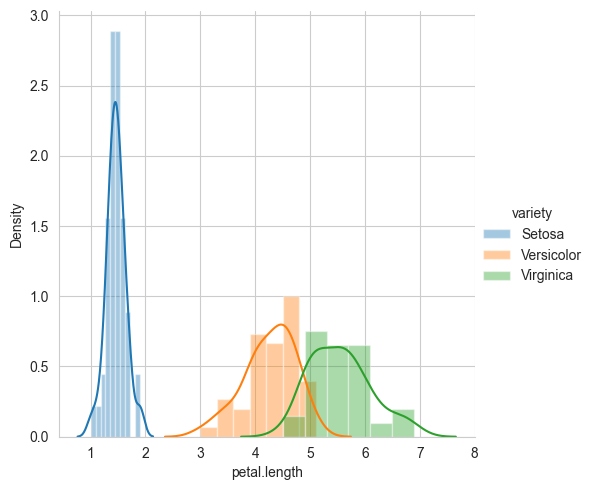

In [11]:
import warnings
warnings.filterwarnings('ignore')

# Histograms are also known as Density Plot or Frequency-Distrbution graph.
# The plot below has petal.length in the x-Axis and count of the points which has that specific 
# petal.length

sns.FacetGrid(iris, hue = 'variety', height = 5) \
    .map(sns.distplot, 'petal.length') \
    .add_legend()
plt.show()

# Observation: We can only Setosa flower using Histogram on Petal.length parameter. To separate
# Virginica and Versicolor we can mark the petal.length to be 4.7 on the x-axis and that can help us
# segregate virginica and versicolor.

# PDFs are smoothed form of a histogram, in the diagram below the curvy plots are the PDFs.
# PDFs shows the number of points which has a specific petal.length

In [12]:
# Univariate Analysis -> One variable Analysis.
# If we are asked a question to determine one variable in this case which is most useful in determining
# a flower.

# If we plot all the histograms with the variables in the x-axis. We will observe that petal.length
# is the most useful feature among the other 3.

# The order is Petal.length > Petal.width > Sepal.Length > Sepal.Width

# If I have to find the 2 most useful features then I will look at the pair-plots.

In [13]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.

### Cumulative Distribution Function(CDF)

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


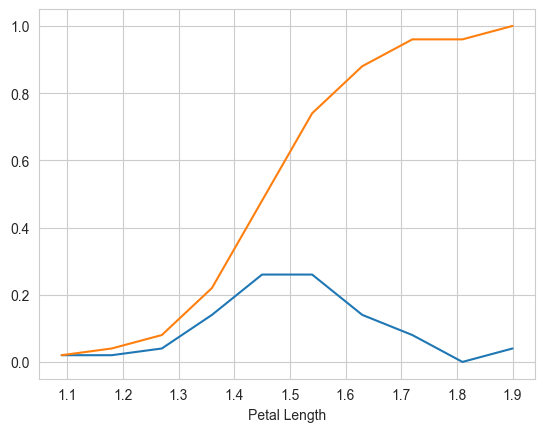

In [14]:
# Need for CDF --> We can visually see what percentage of Versicolor flowers have a petal.length
# of less than 1.6?

# CDF gives the percentage of species which has a petal.length <= petal.length_on_x_Axis

# If we have a PDF then CDF is the area under the curve of the PDF till that point.
# If we differentiate CDF then we will get PDF and if we integrate PDF we will get CDF.

counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins = 10, density = True)

pdf = counts / sum(counts)
print(pdf)
print(bin_edges)

# Compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Petal Length")
plt.show()

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


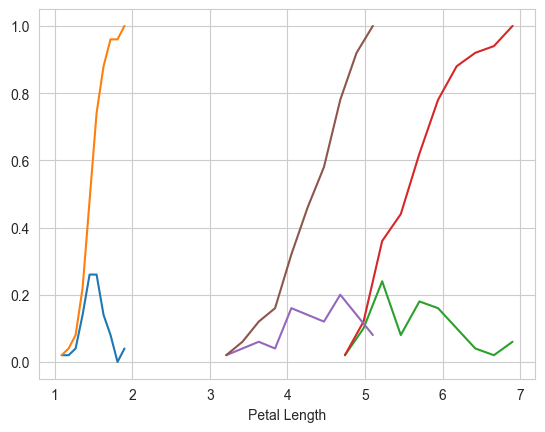

In [15]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal.length only.

# CDFs are more useful here to get the percentage of flowers which have a petal.length less than or
# equal to a specific threshold and can help us build an if-else model upto some extent with
# petal.length feature.

# Setosa
counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Virginica
counts, bin_edges = np.histogram(iris_virginica['petal.length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal.length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel("Petal Length")
plt.show()

## Mean, Variance and Std_deviation

In [16]:
# Mean, Variance, Std-deviation.

# Variance is how much the points are far away from the mean.
# Variance = sum((Xi - mean)**2)/n
# std_deviation = (variance)**0.5
# Standard deviation is how much points are spread from the mean on average.

print("Means:")
print(np.mean(iris_setosa["petal.length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal.length"],50)));
print(np.mean(iris_virginica["petal.length"]))
print(np.mean(iris_versicolor["petal.length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal.length"]))
print(np.std(iris_virginica["petal.length"]))
print(np.std(iris_versicolor["petal.length"]))

Means:
1.4620000000000002
2.4137254901960787
5.5520000000000005
4.26

Std-dev:
0.17191858538273283
0.546347874526844
0.4651881339845203


In [17]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal.length"]))
# Median with an outlier
print(np.median(np.append(iris_setosa["petal.length"],50)));
print(np.median(iris_virginica["petal.length"]))
print(np.median(iris_versicolor["petal.length"]))


print("\nQuantiles:")
# 25th percentile value is Quantile. This is printing 0th, 25th, 50th and 75th percentile.
print(np.percentile(iris_setosa["petal.length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal.length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal.length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
# Value present at the 90th percetile place, in this case we have 50 elements so 90th percentile is 45 when the petal.length is sorted in asc. order.
print(np.percentile(iris_setosa["petal.length"],90))
print(np.percentile(iris_virginica["petal.length"],90))
print(np.percentile(iris_versicolor["petal.length"], 90))

from statsmodels import robust
# Absolute median deviation is the median of all abs(Xi - median) from i = 0 to n.
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal.length"]))
print(robust.mad(iris_virginica["petal.length"]))
print(robust.mad(iris_versicolor["petal.length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


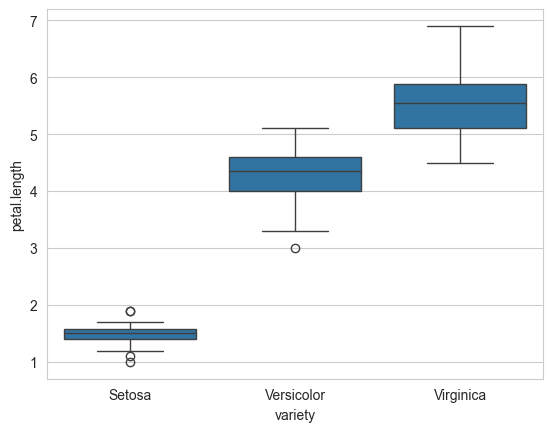

In [22]:
# Box plot uses percentiles to plot.
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='variety',y='petal.length', data=iris)
plt.show()

# We have taken the varieties(Setosa, Versicolor and Virginica) and there are 3 horizontal lines
# the first one is the 25th percentile, 2nd one is the 50th percentile and 3rd one is the 75th
# percentile.

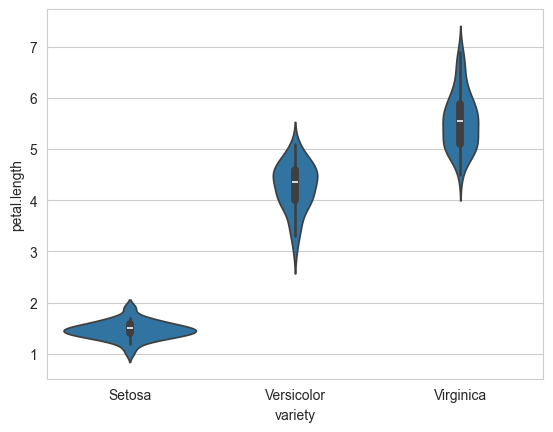

<Figure size 800x600 with 0 Axes>

In [28]:
# A violin plot combines the benefits of the previous two plots (Histogram and Box Plot)
#and simplifies them
# It plots histograms on the side and box plot horizontally.

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x='variety', y='petal.length', data = iris)
plt.figure(figsize=(8, 6))
plt.show() 

### Multivariate probability density plot, contour plot

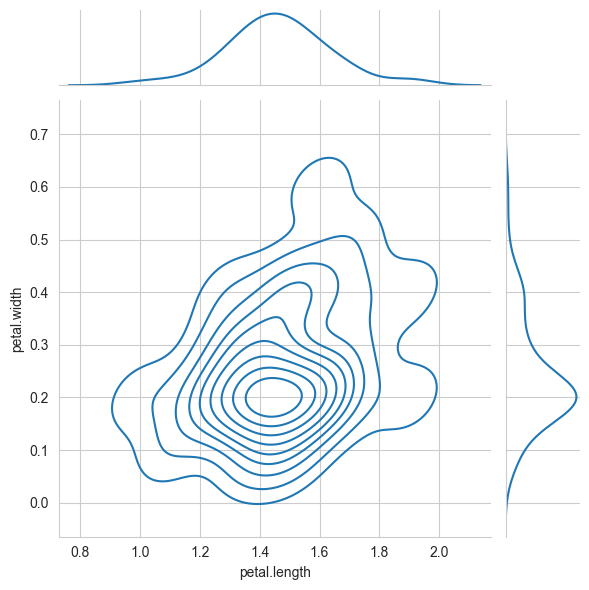

In [30]:
sns.jointplot(x="petal.length", y="petal.width", data=iris_setosa, kind="kde")
plt.show()